In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file
crashes = pd.read_csv('cleaned_data/all_crashes.csv')

In [3]:
# remove object ID and Unnamed 0. column
crashes = crashes.drop(['Unnamed: 0','OBJECTID'],axis =1)

In [4]:
crashes.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME
0,T20140013514,Driving accident,Unfinished,2014/07/01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,2.0,0.0,2.0,0.0,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,Country
1,T20140013549,Driving accident,Finished,2014/07/02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Metro
2,T20140013563,Driving accident,Finished,2014/07/02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Metro
3,T20140013567,Driving accident,Finished,2014/07/02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,2.0,1.0,1.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Metro
4,T20140013582,Driving accident,Finished,2014/07/02,12:20:00,No,Collision with a fixed object,Wednesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,No,...,1.0,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metro


In [5]:
# group by daya_of_week
dow = crashes.groupby("DAY_OF_WEEK")
accident_frequency = dow.count()
accident_frequency = accident_frequency["ACCIDENT_NO"]
# list to reorder accident_frequency 
reorder = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# reorder accident_frequency 
accident_frequency = accident_frequency.reindex(reorder)
accident_frequency

DAY_OF_WEEK
Monday       10415
Tuesday      10886
Wednesday    11238
Thursday     11507
Friday       11651
Saturday      8350
Sunday       12352
Name: ACCIDENT_NO, dtype: int64

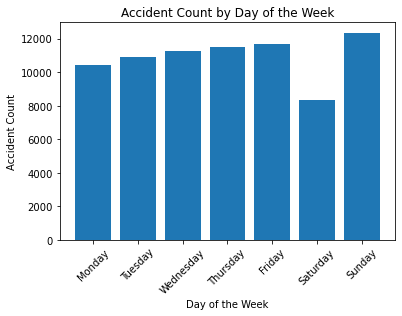

In [6]:
plt.bar(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],accident_frequency)
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Accident Count")
plt.title("Accident Count by Day of the Week")
plt.show()

We can see that the amount of accidents increases throughout the week, but there is a sudden drop in accidents on Saturday. Why? Are less people driving? Are road saftey ads working? Is saturday so low because people are recovering from the night before?

### Fatality count

In [7]:
fatality_sum = dow["FATALITY"].sum()
reorder = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

fatality_sum = fatality_sum.reindex(reorder)
fatality_sum

DAY_OF_WEEK
Monday       240.0
Tuesday      200.0
Wednesday    234.0
Thursday     233.0
Friday       274.0
Saturday     247.0
Sunday       255.0
Name: FATALITY, dtype: float64

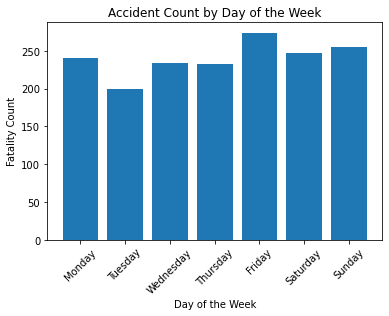

In [8]:
plt.bar(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],fatality_sum)
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Fatality Count")
plt.title("Fatality Count by Day of the Week")
plt.show()

Friday has the highest fatality count. Could this be because on Fridays people go to work AND go out at night? Are people tired from during the week?

Look at accident count grouped by year

In [12]:
# split date into three columns (year,month,day)
crashes[['YEAR',"MONTH"]] = crashes['ACCIDENT_DATE'].str.split('/',1,expand =True)
crashes[['MONTH',"DAY"]] = crashes['MONTH'].str.split('/',1,expand =True)
crashes

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME,YEAR,MONTH,DAY
0,T20140013514,Driving accident,Unfinished,2014/07/01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,0.0,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,Country,2014,07,01
1,T20140013549,Driving accident,Finished,2014/07/02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Metro,2014,07,02
2,T20140013563,Driving accident,Finished,2014/07/02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Metro,2014,07,02
3,T20140013567,Driving accident,Finished,2014/07/02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Metro,2014,07,02
4,T20140013582,Driving accident,Finished,2014/07/02,12:20:00,No,Collision with a fixed object,Wednesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,No,...,1.0,0.0,MELB_URBAN,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metro,2014,07,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76394,T20200005929,Driving accident,Finished,2018/11/02,14:30:00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Metro,2018,11,02
76395,T20200010870,Driving accident,Unfinished,2018/01/15,15:00:00,No,Collision with vehicle,Sunday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,...,0.0,0.0,RURAL_VICTORIA,RURAL_VICTORIA,WYNDHAM,METROPOLITAN NORTH WEST REGION,Metro,2018,01,15
76396,T20200012822,Driving accident,Unfinished,2019/01/17,12:30:00,No,Struck Pedestrian,Wednesday,PARKED CAR RUN AWAY,No,...,0.0,0.0,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,Country,2019,01,17
76397,T20200013045,Driving accident,Unfinished,2019/03/27,17:59:00,No,No collision and no object struck,Tuesday,UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS...,No,...,0.0,1.0,MELB_URBAN,MELB_URBAN,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metro,2019,03,27


In [18]:
# group by year
accidents_per_year = crashes.groupby("YEAR").count()["ACCIDENT_NO"]
accidents_per_year

YEAR
2014     7215
2015    17019
2016    17107
2017    14457
2018    13681
2019     6920
Name: ACCIDENT_NO, dtype: int64

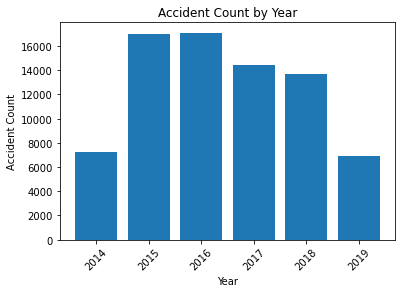

In [19]:
plt.bar(["2014","2015","2016","2017","2018","2019"],accidents_per_year)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.title("Accident Count by Year")
plt.show()

We can see that 2015 and 2016 had the highest accident count. Why? 2019 has the lowest. Did 2019 have less data? Only has until june 30th. This is probably why


Check the dates that we have for crashes in 2019

In [67]:
crashes[crashes["YEAR"] == "2019"]["ACCIDENT_DATE"].sort_values()

55985    2019/01/01
61507    2019/01/01
61508    2019/01/01
61529    2019/01/01
61530    2019/01/01
            ...    
63013    2019/06/30
65780    2019/06/30
76348    2019/06/30
62937    2019/06/30
65782    2019/06/30
Name: ACCIDENT_DATE, Length: 6920, dtype: object

In [93]:
mulitindex_crashes = crashes.set_index(['YEAR','DAY_OF_WEEK'])
mulitindex_crashes


ACCIDENT_NO          ABS_CODE ACCIDENT_STATUS  \
YEAR DAY_OF_WEEK                                                   
2014 Monday       T20140013514  Driving accident      Unfinished   
     Wednesday    T20140013549  Driving accident        Finished   
     Wednesday    T20140013563  Driving accident        Finished   
     Wednesday    T20140013567  Driving accident        Finished   
     Wednesday    T20140013582  Driving accident        Finished   
...                        ...               ...             ...   
2018 Thursday     T20200005929  Driving accident        Finished   
     Sunday       T20200010870  Driving accident      Unfinished   
2019 Wednesday    T20200012822  Driving accident      Unfinished   
     Tuesday      T20200013045  Driving accident      Unfinished   
2018 Friday       T20200017444  Driving accident      Unfinished   

                 ACCIDENT_DATE ACCIDENT_TIME ALCOHOLTIME  \
YEAR DAY_OF_WEEK                                           
2014 Monday         2014/07/01      13:09:00          No   
     Wednesday      2014/07/02      00:01:00         Yes   
     Wednesday      2014/07/02      10:08:00          No   
     Wednesday      2014/07/02      09:12:00          No   
     Wednesday      2014/07/02      12:20:00          No   
...                        ...           ...         ...   
2018 Thursday       2018/11/02      14:30:00          No   
     Sunday         2018/01/15      15:00:00          No   
2019 Wednesday      2019/01/17      12:30:00          No   
     Tuesday        2019/03/27      17:59:00          No   
2018 Friday         2018/05/12      12:00:00          No   

                                      ACCIDENT_TYPE  \
YEAR DAY_OF_WEEK                                      
2014 Monday                  Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday        Collision with a fixed object   
...                                             ...   
2018 Thursday                Collision with vehicle   
     Sunday                  Collision with vehicle   
2019 Wednesday                    Struck Pedestrian   
     Tuesday      No collision and no object struck   
2018 Friday                  Collision with vehicle   

                                                           DCA_CODE  \
YEAR DAY_OF_WEEK                                                      
2014 Monday                                           RIGHT THROUGH   
     Wednesday                                               U TURN   
     Wednesday                    CROSS TRAFFIC(INTERSECTIONS ONLY)   
     Wednesday                                        RIGHT THROUGH   
     Wednesday            OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE   
...                                                             ...   
2018 Thursday                       REAR END(VEHICLES IN SAME LANE)   
     Sunday                       CROSS TRAFFIC(INTERSECTIONS ONLY)   
2019 Wednesday                                  PARKED CAR RUN AWAY   
     Tuesday      UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS...   
2018 Friday                       CROSS TRAFFIC(INTERSECTIONS ONLY)   

                 HIT_RUN_FLAG        LIGHT_CONDITION  ... PASSENGERVEHICLE  \
YEAR DAY_OF_WEEK                                      ...                    
2014 Monday                No                    Day  ...              2.0   
     Wednesday             No  Dark Street lights on  ...              2.0   
     Wednesday            Yes                   Unk.  ...              2.0   
     Wednesday             No                    Day  ...              1.0   
     Wednesday             No                    Day  ...              0.0   
...                       ...                    ...  ...              ...   
2018 Thursday              No                    Day  ...              2.0   
     Sunday